<center>
<h1> CREDIT CARD SEGMENTATION - CASE STUDY

## **BUSINESS CONTEXT :** 
This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. Expectations are: <br>

    1. Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
        a. Monthly average purchase and cash advance amount
        b. Purchases by type (one-off, installments)
        c. Average amount per purchase and cash advance transaction,
        d. Limit usage (balance to credit limit ratio),
        e. Payments to minimum payments ratio etc.
    2. Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    3. Identification of the relationships/ affinities between services.
    4. Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a 
       clustering algorithm to reveal the behavioural segments of credit card holders
    5. Identify cluster characterisitics of the cluster using detailed profiling.
    6. Provide the strategic insights and implementation of strategies for given set of cluster characteristics

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd              
import numpy as np               

import seaborn as sns            

import matplotlib.pyplot as plt  
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

### IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\TAB\\CC_GENERAL.csv")  

### DATA AUDIT

In [3]:
dataset.head()  

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dataset.tail()  # Prints the last five rows of the dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
dataset.shape  # prints the shape of the dataset

(8950, 18)

In [6]:
dataset.info(null_counts = False)  # Prints a small summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   CUST_ID                           object 
 1   BALANCE                           float64
 2   BALANCE_FREQUENCY                 float64
 3   PURCHASES                         float64
 4   ONEOFF_PURCHASES                  float64
 5   INSTALLMENTS_PURCHASES            float64
 6   CASH_ADVANCE                      float64
 7   PURCHASES_FREQUENCY               float64
 8   ONEOFF_PURCHASES_FREQUENCY        float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  float64
 10  CASH_ADVANCE_FREQUENCY            float64
 11  CASH_ADVANCE_TRX                  int64  
 12  PURCHASES_TRX                     int64  
 13  CREDIT_LIMIT                      float64
 14  PAYMENTS                          float64
 15  MINIMUM_PAYMENTS                  float64
 16  PRC_FULL_PAYMENT                  float64


In [7]:
dataset.isna().sum()  # prints the total number of missing values in the dataset

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# splitting continous and categorical valriables to perform some specific functions on them.
# and so have to better clarity of the data

dataset_conti_vars = dataset.loc[:, (dataset.dtypes == 'float64') | (dataset.dtypes == 'int64')]
dataset_cat_vars = dataset.loc[:, dataset.dtypes == 'object']

In [9]:
# creating a UDF to diplay a brief summary of the dataset

def continous_var_summary(x):
    return pd.Series([x.count(), x.isna().sum(), x.sum(), x.min(), x.mean(), x.median(), x.std(), x.var(), 
                      x.quantile(.01), x.quantile(.05), x.quantile(.10), x.quantile(.25), x.quantile(.50), 
                      x.quantile(.75), x.quantile(.90), x.quantile(.95), x.quantile(.99), x.max()], 
                     index = ['N', 'NMISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 'P10', 
                              'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [10]:
dataset_conti_vars.apply(continous_var_summary).T.round(2)  # brief summary of the dataset

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,0.00,1564.47,873.39,2081.53,4332774.97,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.00,0.88,1.00,0.24,0.06,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,0.00,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,0.00,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,0.00,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,0.00,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.00,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


### DATA PREPERATION

#### OUTLIERS TREATMENT

In [11]:
# Clipping outliers with P5 and P95
dataset_conti_vars = dataset_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(.05), upper = x.quantile(.95)))

In [12]:
dataset_conti_vars.apply(continous_var_summary).T.round(2)  # brief summary of the dataset

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,12998976.36,8.81,1452.40,873.39,1688.93,2852482.16,8.81,8.82,23.58,128.28,873.39,2054.14,4338.56,5907.79,5909.11,5909.11
BALANCE_FREQUENCY,8950.0,0.0,7905.11,0.27,0.88,1.00,0.22,0.05,0.27,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,7373574.05,0.00,823.86,361.28,1099.81,1209588.81,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3997.90,3998.62,3998.62
ONEOFF_PURCHASES,8950.0,0.0,4009141.13,0.00,447.95,38.00,746.13,556715.28,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2668.95,2671.09,2671.09
INSTALLMENTS_PURCHASES,8950.0,0.0,3010207.56,0.00,336.34,89.00,497.83,247834.88,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1748.44,1750.09,1750.09
CASH_ADVANCE,8950.0,0.0,7313592.25,0.00,817.16,0.00,1349.18,1820282.04,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4643.58,4647.17,4647.17
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1142.35,0.00,0.13,0.00,0.18,0.03,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.58,0.58


#### MISSING VALUE TREATMENT

In [13]:
# Creating a UDF to treat missing values

def missing_imputation(x, stats = 'mean'):
    if (x.dtype == 'float64') | (x.dtype == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median)
    else:
        x = x.fillna(x.mode())
    return x

In [14]:
# Imputing missing values
# Continous values with the mean and categorical values with the mode 

dataset_conti_vars = dataset_conti_vars.apply(missing_imputation)

In [15]:
dataset_conti_vars.apply(continous_var_summary).T.round(2)  # brief summary of the dataset

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,12998976.36,8.81,1452.40,873.39,1688.93,2852482.16,8.81,8.82,23.58,128.28,873.39,2054.14,4338.56,5907.79,5909.11,5909.11
BALANCE_FREQUENCY,8950.0,0.0,7905.11,0.27,0.88,1.00,0.22,0.05,0.27,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,7373574.05,0.00,823.86,361.28,1099.81,1209588.81,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3997.90,3998.62,3998.62
ONEOFF_PURCHASES,8950.0,0.0,4009141.13,0.00,447.95,38.00,746.13,556715.28,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2668.95,2671.09,2671.09
INSTALLMENTS_PURCHASES,8950.0,0.0,3010207.56,0.00,336.34,89.00,497.83,247834.88,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1748.44,1750.09,1750.09
CASH_ADVANCE,8950.0,0.0,7313592.25,0.00,817.16,0.00,1349.18,1820282.04,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4643.58,4647.17,4647.17
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1142.35,0.00,0.13,0.00,0.18,0.03,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.58,0.58


In [16]:
# Hence, concating the continous and categorical variables to get one final consolidated table

credit = dataset_conti_vars.copy()

In [17]:
# 'CustID' varibale doesn't play an important role in model building.
# Hence dropping that variable.

In [18]:
credit.head()  # prints the first five observations of the new dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,89.988924,643.387510,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


________________________________________________________________________________________________________________

## DRIVING NEW KEY PERFORMANCE INDICATORS ( KPIs )

* ###  Monthly average purchase and cash advance amount

In [19]:
# Calculating Monthly average purchase by dividing 
# 'Total purchase amount spent during last 12 months' by 'Number of months as a customer'

credit['monthly_avg_purchase'] = credit['PURCHASES'] / credit['TENURE']

In [20]:
# Calculating monthly 'cash advance amount' by dividing
# 'Total cash-advance amount' by 'Number of months as a customer'

credit['monthly_cash_advance'] = credit['CASH_ADVANCE'] / credit['TENURE']

In [21]:
credit.head()  # Here is the table with two new columns

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,387.264093
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,89.988924,643.387510,0.000000,12,124.916667,17.149001
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


* ### Purchases by type (one-off, installments)

In [22]:
credit.iloc[:, [4, 5]].head()

,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,95.4,0.000000
1,0.0,4647.169122
2,0.0,0.000000
3,0.0,205.788017
4,0.0,0.000000


In [23]:
# Creating a UDF to create a new KPI 'Purchase_by_type'

def purchase(credit):
    if (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'None'
    elif (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'OneOff_Purchases'
    elif (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
        return 'Installments_Purchases'
    elif (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
        return 'Both_OneOff_Installments_Purchases'

In [24]:
credit['Purchase_by_type'] = credit.apply(purchase, axis = 1)
credit['Purchase_by_type'].value_counts()

Both_OneOff_Installments_Purchases    2774
Installments_Purchases                2260
None                                  2042
OneOff_Purchases                      1874
Name: Purchase_by_type, dtype: int64

* ### Average amount per purchase and cash advance transaction

In [25]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance',
       'Purchase_by_type'],
      dtype='object')

In [26]:
credit.loc[:, ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']].head()

,PURCHASES_TRX,CASH_ADVANCE_TRX
0,2,0
1,0,4
2,12,0
3,1,1
4,1,0


 Average amount per purchase and cash advance transaction KPIs are already there in the dataset.

* ### Limit usage (balance to credit limit ratio)

In [27]:
# limit usage
credit['limit_usage'] = credit.apply(lambda x: x['BALANCE'] / x['CREDIT_LIMIT'], axis=1)
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,Purchase_by_type,limit_usage
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installments_Purchases,0.040901
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,387.264093,None,0.457495
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,OneOff_Purchases,0.332687
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,89.988924,643.387510,0.000000,12,124.916667,17.149001,OneOff_Purchases,0.222223
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,OneOff_Purchases,0.681429


* ### Payments to minimum payments ratio

In [28]:
# payment to minimum payment ratio
credit['payment_minpay'] = credit.apply(lambda x: x['PAYMENTS'] / x['MINIMUM_PAYMENTS'], axis=1)
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,Purchase_by_type,limit_usage,payment_minpay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installments_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,387.264093,None,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,OneOff_Purchases,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,89.988924,643.387510,0.000000,12,124.916667,17.149001,OneOff_Purchases,0.222223,0.139867
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,OneOff_Purchases,0.681429,2.771075


____________________________________________________________________________________________________________

# Advanced reporting: Deriving KPIs to gain insight on the customer profiles.

<h3> KPI One:

In [29]:
# Average 'payment_minpay' ratio for each 'purchse_by_type'.

Kpi1 = credit.groupby('Purchase_by_type').apply(lambda x: np.mean(x['payment_minpay']))

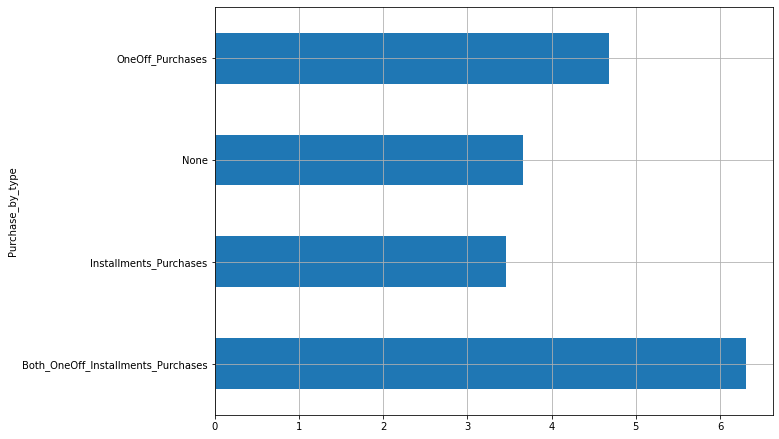

In [30]:
Kpi1.plot.barh()

<center> <h3> Customers with both, One Off Purchases and Installment Purchases are paying dues.

_______________

<h3> KPI Two

In [31]:
Kpi2 = credit.groupby('Purchase_by_type').apply(lambda x: np.mean(x['monthly_cash_advance']))

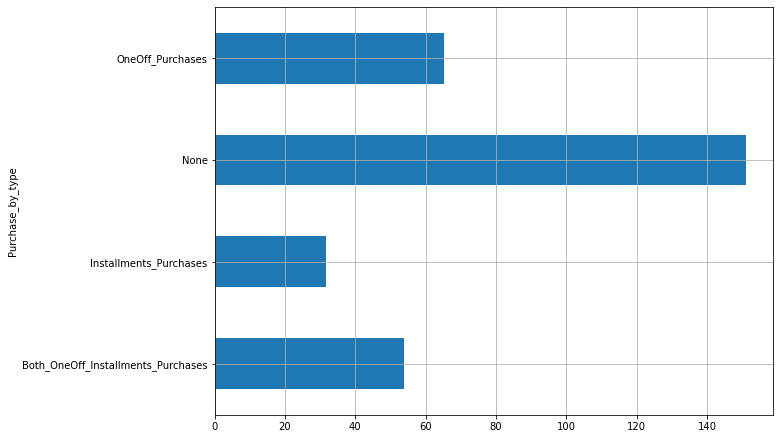

In [32]:
Kpi2.plot.barh()

<center> <h3> Customers who neither take 'OneOff Purchase' nor 'Installment Purchase' take more cash on advance.

__________

<h3> KPI Three

In [33]:
Kpi3 = credit.groupby('Purchase_by_type').apply(lambda x: np.mean(x['limit_usage']))

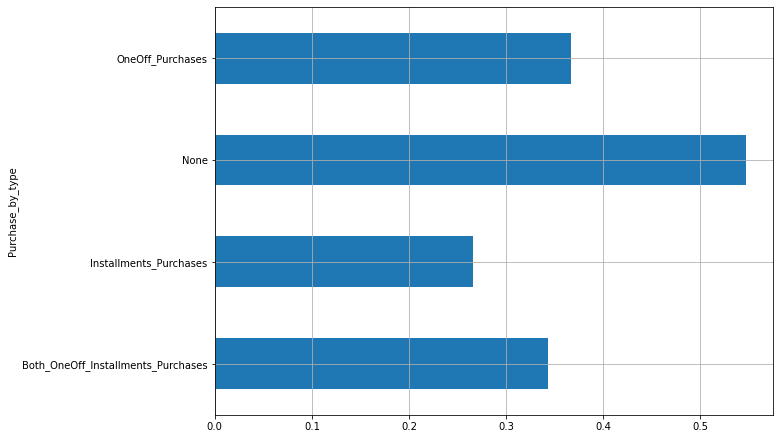

In [34]:
Kpi3.plot.barh()

<center>  <h3> Customers with 'Installment purchases' have good credit score

____

### CREATING DUMMY VARIBALES

In [35]:
# creating dummy variables of 'Purchase_by_type' variable for model building

col_dummies = pd.get_dummies(credit['Purchase_by_type'])
credit = pd.concat([credit, col_dummies], axis = 1)
credit.drop('Purchase_by_type', axis = 1, inplace = True)

In [36]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,limit_usage,payment_minpay,Both_OneOff_Installments_Purchases,Installments_Purchases,None,OneOff_Purchases
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,387.264093,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.139867,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [37]:
# Correlation matrix
corrm = credit.corr()
corrm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,monthly_cash_advance,limit_usage,payment_minpay,Both_OneOff_Installments_Purchases,Installments_Purchases,None,OneOff_Purchases
BALANCE,1.000000,0.370254,0.124336,0.138493,0.040367,0.565401,-0.102891,0.070789,-0.089514,0.489843,...,-0.359881,0.075801,0.120453,0.542928,0.584793,-0.266246,0.077499,-0.232155,0.182315,-0.028233
BALANCE_FREQUENCY,0.370254,1.000000,0.192937,0.153188,0.170524,0.116485,0.237081,0.204411,0.184918,0.200011,...,-0.111917,0.133089,0.187263,0.101477,0.450726,-0.180799,0.195141,-0.130401,0.011554,-0.094483
PURCHASES,0.124336,0.192937,1.000000,0.865282,0.710001,-0.137265,0.589131,0.658719,0.461632,-0.187429,...,0.215231,0.121018,0.994678,-0.142289,-0.114365,0.359803,0.575595,-0.164638,-0.407298,-0.058367
ONEOFF_PURCHASES,0.138493,0.153188,0.865282,1.000000,0.319737,-0.092469,0.394927,0.764991,0.168362,-0.121483,...,0.127898,0.087760,0.864091,-0.096278,-0.083113,0.323703,0.501063,-0.348961,-0.326428,0.139761
INSTALLMENTS_PURCHASES,0.040367,0.170524,0.710001,0.319737,1.000000,-0.147078,0.639240,0.251237,0.729578,-0.200741,...,0.238894,0.116144,0.701401,-0.151439,-0.115417,0.232288,0.485354,0.163791,-0.367340,-0.347702
CASH_ADVANCE,0.565401,0.116485,-0.137265,-0.092469,-0.147078,1.000000,-0.286882,-0.122090,-0.238361,0.739399,...,-0.211834,-0.097117,-0.133123,0.985933,0.276838,-0.040302,-0.099008,-0.200088,0.348281,-0.033025
PURCHASES_FREQUENCY,-0.102891,0.237081,0.589131,0.394927,0.639240,-0.286882,1.000000,0.501343,0.862934,-0.333006,...,0.305802,0.069300,0.587375,-0.285854,-0.214400,0.134093,0.515593,0.295918,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.070789,0.204411,0.658719,0.764991,0.251237,-0.122090,0.501343,1.000000,0.142329,-0.125492,...,0.157531,0.087045,0.655652,-0.123920,-0.099977,0.244952,0.525795,-0.394452,-0.368981,0.204113
PURCHASES_INSTALLMENTS_FREQUENCY,-0.089514,0.184918,0.461632,0.168362,0.729578,-0.238361,0.862934,0.142329,1.000000,-0.282139,...,0.250087,0.079282,0.455849,-0.239219,-0.171555,0.082312,0.463390,0.430024,-0.498338,-0.471909
CASH_ADVANCE_FREQUENCY,0.489843,0.200011,-0.187429,-0.121483,-0.200741,0.739399,-0.333006,-0.125492,-0.282139,1.000000,...,-0.267346,-0.127201,-0.182262,0.733875,0.397236,-0.110402,-0.104190,-0.252571,0.403497,-0.028043


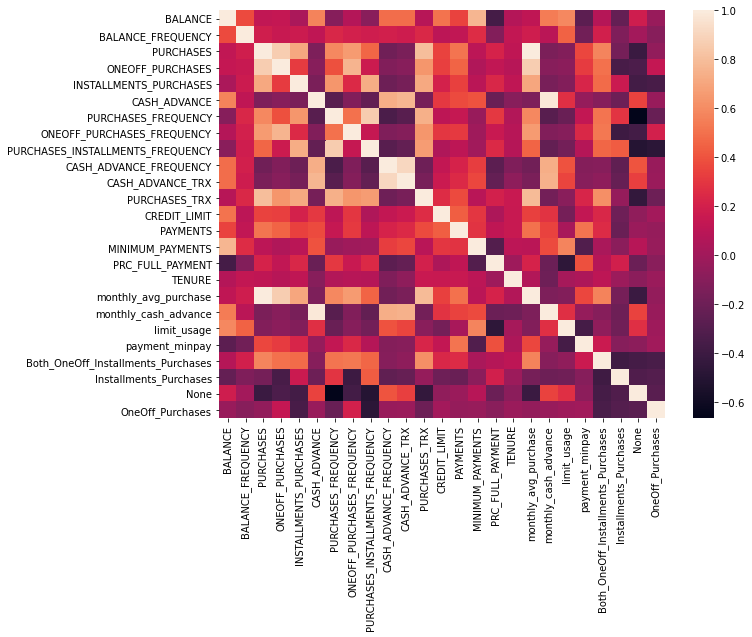

In [38]:
sns.heatmap(corrm)  # Heat map

In [39]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'Both_OneOff_Installments_Purchases',
       'Installments_Purchases', 'None', 'OneOff_Purchases'],
      dtype='object')

Heat map shows that many features are co-related so applying dimensionality reduction through PCA to get uncorrelated variables

### STANDARDISING THE DATA

In [40]:
# for standardisation | to bring mean --> 0 and Standard Deviation --> 1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

credit_scaled = sc.fit_transform(credit)

### APPLYING PCA : PRINCIPAL COMPONENT ANALYSIS

In [41]:
credit_scaled.shape  # Prints the shape of the credit_scaled dataset

(8950, 25)

In [42]:
# performing Principal component analysis

from sklearn.decomposition import PCA

var_ratio = {}

for n in range(5, 25):
    pc = PCA(n_components = n)
    credit_pca = pc.fit(credit_scaled)
    var_ratio[n] = sum(credit_pca.explained_variance_ratio_)

In [43]:
var_ratio

{5: 0.7194611403837203,
 6: 0.7673876784438063,
 7: 0.8041824270743962,
 8: 0.8401367149081496,
 9: 0.8697143428155154,
 10: 0.8911956202165876,
 11: 0.9124200214201557,
 12: 0.930236518407544,
 13: 0.9450716516899174,
 14: 0.9584137056862164,
 15: 0.9684882961141353,
 16: 0.9764767579317,
 17: 0.9837697256387621,
 18: 0.9892865087844769,
 19: 0.9937852281032762,
 20: 0.9968223142724596,
 21: 0.9985009509548277,
 22: 0.9995219770777451,
 23: 0.9998640376463543,
 24: 1.0}

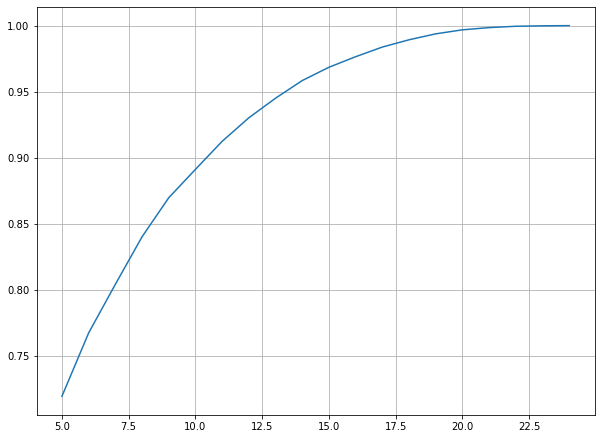

In [44]:
pd.Series(var_ratio).plot()

<center> <h3> Since, 9 components explain 86% of the data. Hence, we will select those 9 components

In [45]:
# Applying n_components as 9 because 9 components explains 86% of the data

pc = PCA(n_components = 9)

credit_pca = pc.fit(credit_scaled)

In [46]:
col_list = credit.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'Both_OneOff_Installments_Purchases',
       'Installments_Purchases', 'None', 'OneOff_Purchases'],
      dtype='object')

In [47]:
pd.DataFrame(credit_pca.components_.T, columns = ['PC_' + str(i) for i in range(9)], index = col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
BALANCE,-0.047401,0.364367,-0.137648,-0.146822,0.195124,-0.127710,-0.121188,0.131706,-0.151061
BALANCE_FREQUENCY,0.053882,0.182520,-0.215134,-0.239843,-0.167596,0.030516,0.361055,-0.325977,-0.500455
PURCHASES,0.328937,0.141695,0.082936,-0.028400,-0.015669,-0.009472,0.081186,0.201252,0.038460
ONEOFF_PURCHASES,0.267718,0.151998,0.259076,-0.143272,-0.018181,0.060773,0.042071,0.126367,-0.014805
INSTALLMENTS_PURCHASES,0.278818,0.061231,-0.225803,0.145063,-0.035860,-0.079109,0.047414,0.164322,0.112874
CASH_ADVANCE,-0.148502,0.333146,0.006418,0.264192,0.086448,0.120122,-0.044327,-0.096185,0.060444
PURCHASES_FREQUENCY,0.306143,-0.022151,-0.234055,0.035735,0.083739,0.227586,0.011816,-0.177936,-0.027457
ONEOFF_PURCHASES_FREQUENCY,0.249454,0.117873,0.246201,-0.194323,-0.034869,0.184056,-0.035288,-0.175904,-0.123492
PURCHASES_INSTALLMENTS_FREQUENCY,0.258223,-0.035837,-0.389788,0.156449,-0.005902,0.081141,-0.026259,-0.069119,0.077332
CASH_ADVANCE_FREQUENCY,-0.170773,0.307674,-0.012959,0.156184,-0.108603,0.212362,0.105512,-0.185784,0.106034


In [48]:
# Factor Analysis : variance explained by each component- 

pd.Series(credit_pca.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(9)])

PC_0    0.285821
PC_1    0.204447
PC_2    0.097649
PC_3    0.080338
PC_4    0.051206
PC_5    0.047927
PC_6    0.036795
PC_7    0.035954
PC_8    0.029578
dtype: float64

In [49]:
reduced_credit = credit_pca.fit_transform(credit_scaled)

In [50]:
df = pd.DataFrame(reduced_credit)  # New dataframe to perform clustering

In [51]:
df.shape  # prints the shape of the new datset

(8950, 9)

In [52]:
df.head() # prints the first five rows of the dataset

,0,1,2,3,4,5,6,7,8
0,-1.313513,-2.838654,-0.542384,0.025271,0.431846,-0.290160,0.009589,-0.060720,0.512052
1,-3.174895,3.083190,0.553045,1.884479,0.187037,-1.296895,-0.206167,-0.000545,-0.691947
2,0.860594,-0.093187,1.535340,-2.641136,1.580652,0.637444,-0.352826,-0.978652,-1.015153
3,-0.395109,-0.465372,2.128858,-1.636651,1.672135,-0.105707,-0.856420,0.607527,0.352024
4,-1.756117,-1.559736,0.908750,-2.131490,0.431852,0.068186,1.097877,-0.365272,0.286727


## CLUSTERING

In [53]:
# Improting required libraries for clustering
from sklearn.cluster import KMeans

In [54]:
wcss = [] # Within the cluster some of scatter

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

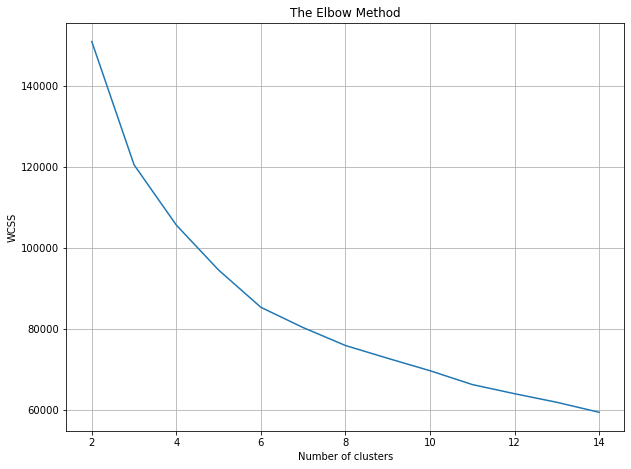

In [55]:
# Plotting elbow curve

plt.plot(range(2, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<center> <h3> SIX Clusters explains the  most of the data.

In [56]:
# creating 6 clusters

kmeans = KMeans(n_clusters = 6).fit(df)
kmeans.labels_

array([1, 0, 2, ..., 1, 5, 2])

In [57]:
# value counts

values = pd.Series(kmeans.labels_).value_counts()
values = values.sort_index()
values

0    1127
1    2074
2    1525
3    1022
4    1585
5    1617
dtype: int64

### CLUSTERS VISUALISATION

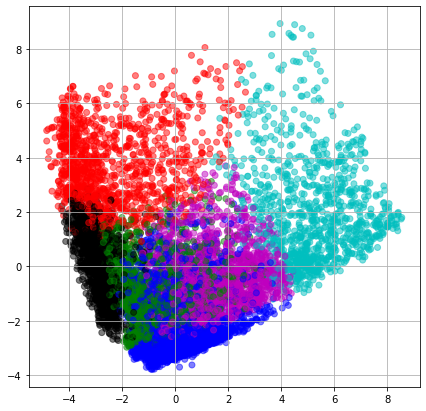

In [58]:
color_map = {0:'r', 1:'b', 2:'g', 3:'c', 4:'m', 5:'k'}

label_color = [color_map[l] for l in kmeans.labels_]

plt.figure(figsize = (7, 7))

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = label_color, cmap = 'Spectral',alpha = 0.5)

In [59]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'Both_OneOff_Installments_Purchases',
       'Installments_Purchases', 'None', 'OneOff_Purchases'],
      dtype='object')

In [60]:
# Key performace variable selection . Here I am dropping varibales which are used in derving new KPI

col_kpi = ['PURCHASES_TRX', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage', 'CASH_ADVANCE_TRX',
           'payment_minpay', 'Both_OneOff_Installments_Purchases', 'Installments_Purchases', 'OneOff_Purchases',
           'None', 'CREDIT_LIMIT']

In [61]:
cluster_df_6 = pd.concat([credit[col_kpi], pd.Series(kmeans.labels_, name = 'Cluster_6')], axis=1)

In [69]:
cluster_df_6.head()

,PURCHASES_TRX,monthly_avg_purchase,monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,Both_OneOff_Installments_Purchases,Installments_Purchases,OneOff_Purchases,None,CREDIT_LIMIT,Cluster_6
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,1
1,0,0.000000,387.264093,0.457495,4,3.826241,0,0,0,1,7000.0,0
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,2
3,1,124.916667,17.149001,0.222223,1,0.139867,0,0,1,0,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,2


In [63]:
six_cluster = cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,6.422360,11.348602,5.824262,42.936399,18.839748,0.076067
monthly_avg_purchase,35.701091,42.215897,51.104014,281.673053,86.627515,0.288267
monthly_cash_advance,319.995110,11.478005,23.556156,44.484755,19.759040,95.512734
limit_usage,0.587744,0.234099,0.332137,0.300992,0.327083,0.541635
CASH_ADVANCE_TRX,10.274179,0.442141,1.196066,1.677104,1.150158,4.076685
payment_minpay,3.036378,3.470646,4.371132,11.051784,4.349568,3.767951
Both_OneOff_Installments_Purchases,0.215617,0.002893,0.001967,0.903131,1.000000,0.008658
Installments_Purchases,0.127773,0.997107,0.000000,0.020548,0.000000,0.016698
OneOff_Purchases,0.242236,0.000000,0.998033,0.076321,0.000000,0.000618
None,0.414374,0.000000,0.000000,0.000000,0.000000,0.974026



---


# Checking performance metrics for Kmeans with Silhouette score

In [70]:
# Importing required libraries to check performance matrix
from sklearn.metrics import silhouette_score

In [71]:
score = {}

for n in range(2,15):
    km_score = KMeans(n_clusters = n)
    km_score.fit(df)
    score[n] = silhouette_score(df, km_score.labels_)

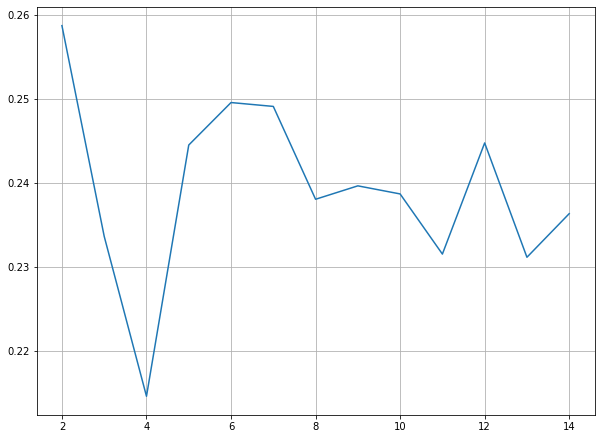

In [66]:
pd.Series(score).plot()

<center> <h2> Performance metrics also suggest that  K-means with 6 cluster is able to show distinguished characteristics of each cluster.




___

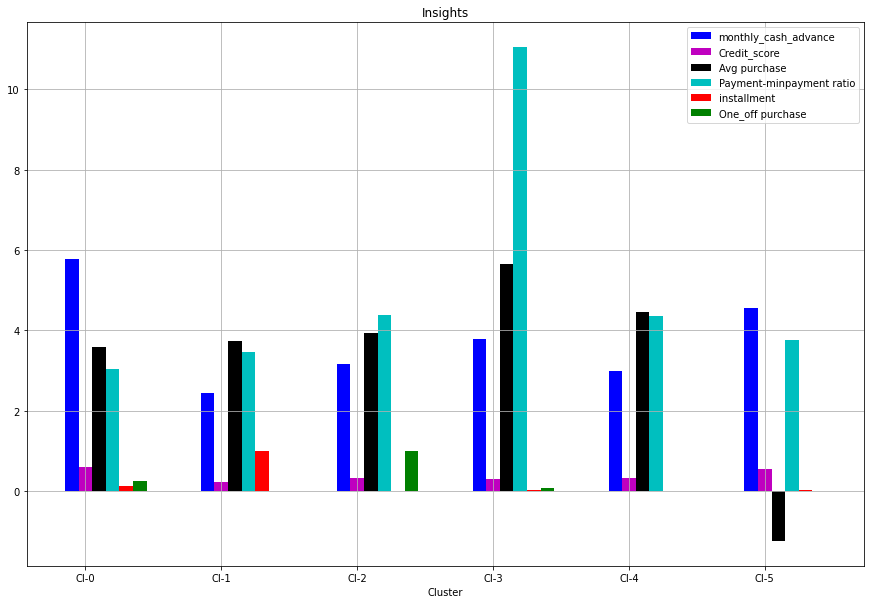

In [67]:
# Plotting all the clusters with some important varibales 

fig,ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(six_cluster.columns))

cash_advance = np.log(six_cluster.loc['monthly_cash_advance',:].values)
credit_score = (six_cluster.loc['limit_usage',:].values)
purchase = np.log(six_cluster.loc['monthly_avg_purchase',:].values)
payment = six_cluster.loc['payment_minpay',:].values
installment = six_cluster.loc['Installments_Purchases',:].values
one_off = six_cluster.loc['OneOff_Purchases',:].values

bar_width = .10
b1 = plt.bar(index,cash_advance, color = 'b', label = 'monthly_cash_advance', width = bar_width)
b2 = plt.bar(index + bar_width, credit_score, color = 'm', label = 'Credit_score', width = bar_width)
b3 = plt.bar(index + 2 * bar_width, purchase, color = 'k', label = 'Avg purchase', width = bar_width)
b4 = plt.bar(index + 3 * bar_width, payment, color = 'c', label = 'Payment-minpayment ratio', width = bar_width)
b5 = plt.bar(index + 4 * bar_width, installment, color = 'r', label = 'installment', width = bar_width)
b6 = plt.bar(index + 5 * bar_width, one_off, color = 'g', label = 'One_off purchase', width = bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [68]:
# Percentage of every cluster in the data

for i in range(0, 6):
    x = ((values[i]*100)/values.sum()).round()
    print(i, 'group is about', x, '% of the customer database')

0 group is about 13.0 % of the customer database
1 group is about 23.0 % of the customer database
2 group is about 17.0 % of the customer database
3 group is about 11.0 % of the customer database
4 group is about 18.0 % of the customer database
5 group is about 18.0 % of the customer database


### Insights with the 6 Clusters

<large>

- Cluster 0 customers are taking highest monthly cash advance and  have maximum credit score. This group is about **13%** of the total customer base.


- Cluster 1 customers are taking low monthly advance_cash but have good monthly average purchase and are paying dues on time. This group is about **23%** of the total customer base.


- Cluster 2 customers stands out from the rest because they are taking low monthly advance_cash but have good monthly average purchase and are paying dues very much on time. This group is about **17%** of the total customer base.


- Cluster 3 customers are buying mostly one-off purchase with a good payment to minimum payment ratio. This group is about **11%** of the total customer base.
 
- cluster 4 customers are with high monthly average purchase. This group is about **18%** of the total customer base.


- Cluster 5 customers are taking maximum monthly advance_cash but with no monthly average purchase. This group is about **18%** of the total customer base







---

